# Benchmark and Relative Percentage Graph with a bumpy chart

In [1]:
import json
from urllib.request import urlopen

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from highlight_text import fig_text

from mplsoccer import Bumpy, FontManager, add_image

In [2]:
# Get the data

player_dict = json.load(
    urlopen(("https://github.com/andrewRowlinson/mplsoccer-assets/blob/main/"
             "percentile.json?raw=true"))
)

In [9]:
player_names=[]
for i in player_dict.keys():
    player_names.append(i)
    
# or this  
    
#player_names=[]
#for i,j in player_dict.items():
#    player_names.append(i)
    
   

In [10]:
player_names[0]

'Francesco Acerbi'

In [12]:
player_values=[]
for i in player_dict.values()
    player_values.append(i)    

# or this

#player_values=[]
#for i,j in player_dict.items():
#    player_values.append(j)
    




In [13]:
player_values[0]

[4.48, 4.11, 7.61, 6.32, 4.66, 7.67]

In [14]:
# This will average each set values, but how do we average down each list? 

avgDict = {}
for k,v in player_dict.items():
    # v is the list of grades for student k
    avgDict[k] = sum(v)/float(len(v))

In [15]:
# Or we could just make a DF from the player_dict dictionary

df_players = pd.DataFrame.from_dict(player_dict, orient='index',columns=[
    "xA", "Passes\nInto Pen", "Passes\nInto Final 1/3", "Progressive\nPass Distance",
    "Pass\nReceive%", "Progressive\nCarry Distance"])

In [16]:
df_players.head()

,xA,Passes\nInto Pen,Passes\nInto Final 1/3,Progressive\nPass Distance,Pass\nReceive%,Progressive\nCarry Distance
Francesco Acerbi,4.48,4.11,7.61,6.32,4.66,7.67
Luis Alberto,9.48,10.00,10.00,9.08,3.07,9.94
Bruno Alves,0.83,0.61,3.50,7.55,4.05,3.68
Sofyan Amrabat,2.88,6.44,8.28,3.56,1.66,5.15
Tolgay Arslan,2.88,6.50,5.95,1.60,8.10,8.10


In [17]:
# Get the mean of each metric:

df2 = df_players.mean(axis='rows')

In [18]:
df2

xA                             5.029877
Passes\nInto Pen               5.030307
Passes\nInto Final 1/3         5.030675
Progressive\nPass Distance     5.030675
Pass\nReceive%                 5.030675
Progressive\nCarry Distance    5.030613
dtype: float64

In [19]:
# turn the series into a DF
df2 = pd.DataFrame(df2).transpose()

In [20]:
df2

,xA,Passes\nInto Pen,Passes\nInto Final 1/3,Progressive\nPass Distance,Pass\nReceive%,Progressive\nCarry Distance
0,5.029877,5.030307,5.030675,5.030675,5.030675,5.030613


In [21]:
# add an index to df2 "Group_Average"
df2.rename(index={0: 'Group_Average'}, inplace=True)

In [22]:
df2

,xA,Passes\nInto Pen,Passes\nInto Final 1/3,Progressive\nPass Distance,Pass\nReceive%,Progressive\nCarry Distance
Group_Average,5.029877,5.030307,5.030675,5.030675,5.030675,5.030613


In [23]:
# Add df2 to df_players
df_players = df_players.append(df2)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8212\3673247749.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_players = df_players.append(df2)


In [24]:
# Transpose so that the names are the columns (columns become the dict keys)
df_players_transposed = df_players.transpose()

In [25]:
df_players_transposed.head()

,Francesco Acerbi,Luis Alberto,Bruno Alves,Sofyan Amrabat,Tolgay Arslan,Tommaso Augello,Kaan Ayhan,Milan Badelj,Tiemoué Bakayoko,Mattia Bani,...,Mërgim Vojvoda,Stefan de Vrij,Miloš Vulić,Sebastian Walukiewicz,Maya Yoshida,Ashley Young,Cristián Zapata,Marvin Zeegelaar,Piotr Zieliński,Group_Average
xA,4.48,9.48,0.83,2.88,2.88,5.80,1.99,7.52,5.80,0.83,...,6.90,3.77,6.90,0.83,1.99,8.40,0.83,5.18,8.19,5.029877
Passes\nInto Pen,4.11,10.00,0.61,6.44,6.50,6.81,3.80,9.08,4.05,2.58,...,8.40,2.88,5.28,2.02,1.75,9.75,0.61,7.98,5.40,5.030307
Passes\nInto Final 1/3,7.61,10.00,3.50,8.28,5.95,4.54,4.20,8.16,9.08,1.41,...,3.74,3.37,2.12,2.02,2.76,1.53,0.18,2.12,8.90,5.030675
Progressive\nPass Distance,6.32,9.08,7.55,3.56,1.60,7.48,4.72,6.13,3.31,7.06,...,6.87,4.11,0.49,6.63,5.83,2.64,4.97,2.21,1.90,5.030675
Pass\nReceive%,4.66,3.07,4.05,1.66,8.10,1.72,9.82,7.06,7.52,5.52,...,9.26,3.87,5.64,2.09,6.01,7.73,9.20,5.95,6.75,5.030675


In [26]:
# Turn the dataFrame back to a dictionary for the bumpy plot
df_players_todict = df_players_transposed.to_dict('list')

In [27]:
df_players_todict

{'Francesco Acerbi': [4.48, 4.11, 7.61, 6.32, 4.66, 7.67],
 'Luis Alberto': [9.48, 10.0, 10.0, 9.08, 3.07, 9.94],
 'Bruno Alves': [0.83, 0.61, 3.5, 7.55, 4.05, 3.68],
 'Sofyan Amrabat': [2.88, 6.44, 8.28, 3.56, 1.66, 5.15],
 'Tolgay Arslan': [2.88, 6.5, 5.95, 1.6, 8.1, 8.1],
 'Tommaso Augello': [5.8, 6.81, 4.54, 7.48, 1.72, 8.28],
 'Kaan Ayhan': [1.99, 3.8, 4.2, 4.72, 9.82, 4.91],
 'Milan Badelj': [7.52, 9.08, 8.16, 6.13, 7.06, 1.78],
 'Tiemoué Bakayoko': [5.8, 4.05, 9.08, 3.31, 7.52, 2.45],
 'Mattia Bani': [0.83, 2.58, 1.41, 7.06, 5.52, 1.29],
 'Federico Barba': [1.99, 5.74, 3.93, 7.85, 7.98, 3.01],
 'Nicolò Barella': [9.02, 9.88, 8.59, 6.99, 2.45, 8.34],
 'Alessandro Bastoni': [2.88, 3.99, 7.91, 8.53, 4.29, 9.69],
 'Simone Bastoni': [9.36, 8.1, 6.44, 8.16, 7.24, 8.77],
 'Rodrigo Becão': [0.83, 1.29, 4.36, 5.34, 2.02, 6.63],
 'Ismaël Bennacer': [5.18, 7.79, 8.96, 7.67, 8.22, 8.47],
 'Rodrigo Bentancur': [6.17, 6.01, 9.69, 7.79, 6.5, 5.09],
 'Bartosz Bereszyński': [3.77, 4.36, 2.82, 5.

## Visualize

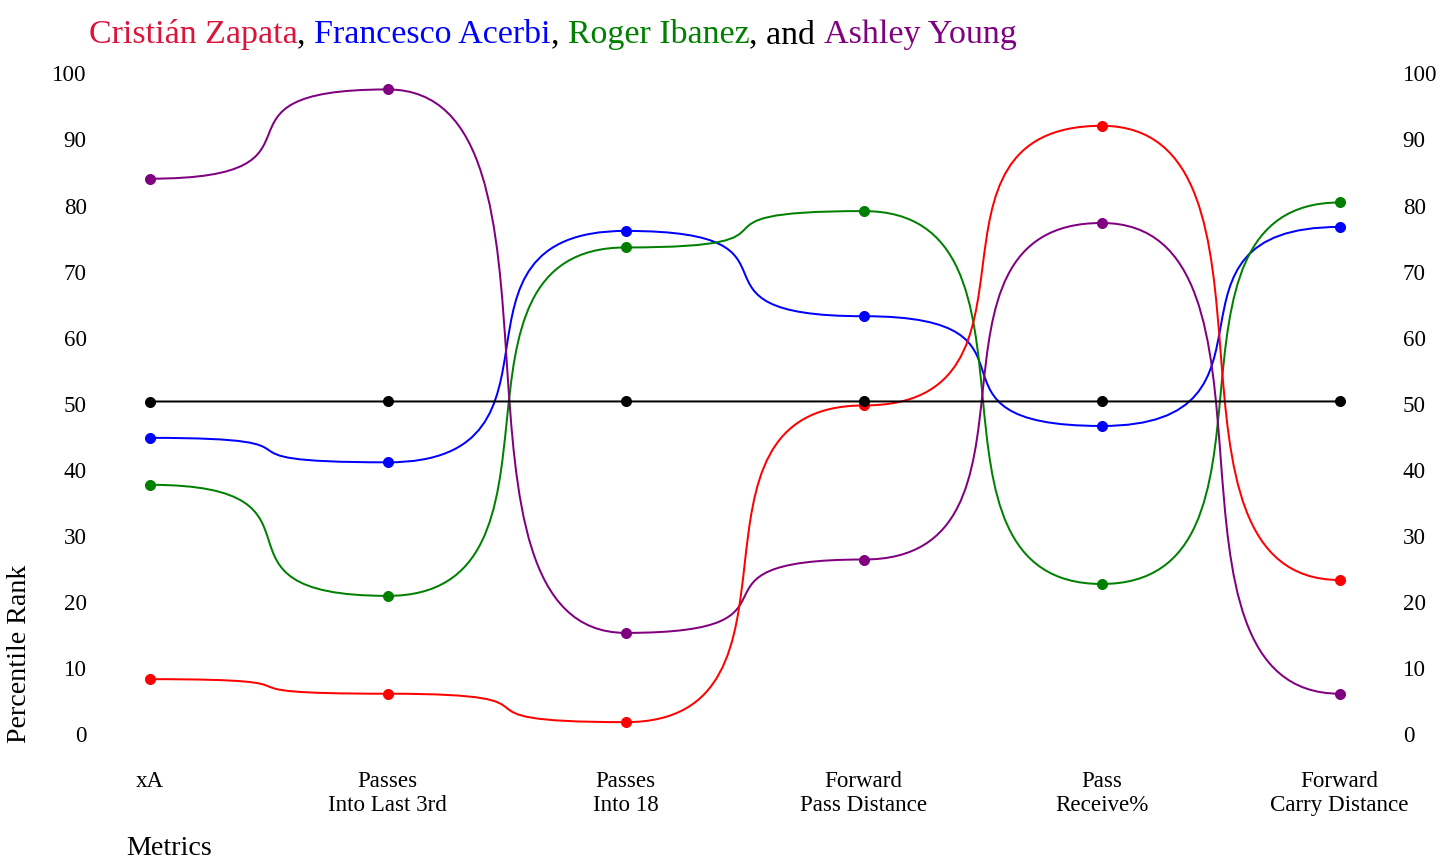

In [28]:
# Choose metrics you want to compare and put them into a list (params) for the Radar function
# Note: The group average calculations are all 5 (50%) because the data are lists of the 
#       relative percentages. Why would you calculate that in advance? The data should be the 
#       absolute values for each player, and then there should be a group average line as a reference
#       That's the way I did it for the radar chart

# If not the above then the points should show absolute values for each player. You have to have the 
#     absolute values along with the relative percentages because the relative percentages can be 
#     misleading.

# At least have min and max values so that you can get an idea of what matters and what doesn't.


# These charts would be complemented well with an APG for the individual to help confirm the main functions
#    he's performing and from where.

# I THINK WE CAN DO SOME MEANINGFUL ML WITH THESE BUMPY CHARTS. A lot of lines to bui;d features 
#    and find meaningful patterns in.

metrics = [
    "xA", "Passes\nInto Last 3rd", "Passes\nInto 18", "Forward\nPass Distance",
    "Pass\nReceive%", "Forward\nCarry Distance"]

highlight_dict = {
    "Cristián Zapata": "red",
    "Francesco Acerbi": "blue",
    "Roger Ibanez": 'green' ,
    "Ashley Young": 'purple', 
    "Group_Average": "black"
}


# Create bumply chart
bumpy = Bumpy(
    
    background_color="white", scatter_color="white",
    label_color="black", line_color="white",
    rotate_xticks=0, ticklabel_size=23, label_size=28, scatter="value",
    show_right=True, alignment_yvalue=0.15, alignment_xvalue=0.06)

    
# Visualize     
fig, ax = bumpy.plot(
    x_list=metrics, y_list=np.linspace(0, 100, 11).astype(int), values= df_players_todict,
    secondary_alpha=0.1, highlight_dict=highlight_dict,
    figsize=(20, 12),
    x_label="Metrics", y_label="Percentile Rank", ylim=(0.5, 12),
    upside_down=True,
    fontfamily="Liberation Serif"
)  
    
# title and subtitle
TITLE = "<Cristián Zapata>, <Francesco Acerbi>, <Roger Ibanez>, and <Ashley Young>"

# add title
fig_text(
    0.06, 0.98, TITLE, color='black',
    highlight_textprops=[{"color": 'crimson'}, {"color": 'blue'}, {'color': 'green'},{"color":'purple'}],
    size=34, fig=fig, fontfamily="Liberation Serif"
)
# if space is left in the plot use this
plt.tight_layout(pad=0.5)                   
    